## 지하철 시간대별 데이터 시각화

In [3]:
import pandas as pd 
import numpy as np
import csv
PATH = '../DATA_WOO/subway_time.csv'


In [2]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [8]:
# map(ft, iterable)
# 첫번째 인자: 데이터에 적용할 함수이름
# 두번째 인자: 그 함수를 적용할 데이터
def func(x):
    return x**2
a = [1,2,3,4]
a = list(map(func,a))
print(a)

# map형태의 데이터를 리스트로 변경
data = ['1','2','3','4']
print(list(map(int, data)))

[1, 4, 9, 16]
[1, 2, 3, 4]


### 시간대별 지하철 이용수

In [12]:
result = []
total = 0

with open(PATH) as f:
    data = csv.reader(f)
    next(data)
    next(data)
    for row in data:
        row[4:] = map(int, row[4:])
        total += row[4]
        result.append(row[4])
print(f'총 지하철 역의 수: {len(result)}') 
print(f'새벽 4시 승차 인원: {(total)}') 

총 지하철 역의 수: 615
새벽 4시 승차 인원: 135398


<BarContainer object of 615 artists>

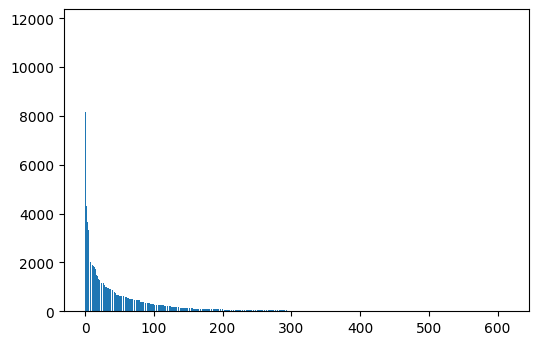

In [23]:
import matplotlib.pyplot as plt
result.sort(reverse=True)
plt.figure(dpi=100)
plt.bar(range(len(result)), result)

### 출근 시간대(7~9시까지) 모든 역의 승차인원을 계산하고 막대그래프로 출력
- 7시,8시, index=10,12,14

최대 승차 인원역: 신림 2호선 638753


<BarContainer object of 615 artists>

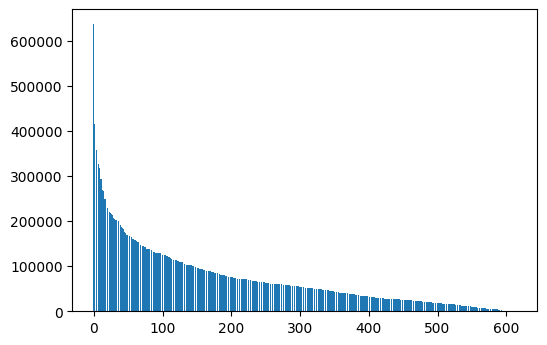

In [37]:
result = []
max_sum = -1
max_station = 0
with open(PATH) as f:
    data = csv.reader(f)
    next(data)
    next(data)
    for row in data:
        row[4:] = map(int, row[4:])
        row_sum = sum(row[10:15:2])

        result.append(row_sum)
        if max_sum < row_sum:
            max_sum = row_sum
            max_station = row[3] + ' ' + row[1]

print(f'최대 승차 인원역: {max_station} {max_sum}')
result.sort(reverse=True)
plt.figure(dpi=100)
plt.bar(range(len(result)), result)

### 시간대별 가장 많이 승차하는 역 정보분석은?
- 시간대: 새벽 4시 ~ 새벽 2시 (새벽3시만 없다.)

4시: 구로, 11784, 5시: 신림, 38809, 6시: 신림, 73523, 7시: 신림, 188110, 
8시: 신림, 281017, 9시: 신림, 169626, 10시: 신림, 91989, 11시: 신림, 77496, 
12시: 잠실(송파구청), 84383, 13시: 강남, 95697, 14시: 강남, 106394, 15시: 강남, 131625, 
16시: 강남, 154526, 17시: 강남, 231839, 18시: 강남, 314775, 19시: 강남, 196425, 
20시: 강남, 155347, 21시: 강남, 180108, 22시: 강남, 176473, 23시: 강남, 81016, 
0시: 강남, 12407, 1시: 건대입구, 8, 2시: 동묘앞, 1, 

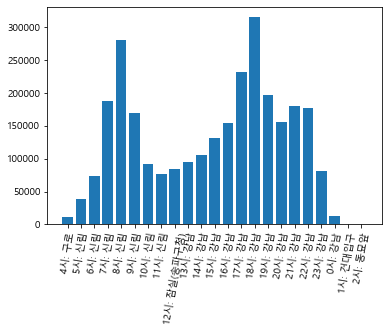

In [43]:
# Matplotlib 한글 폰트 설정
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path = '../FONT/malgun.ttf'
font_name = fm.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)


max = [0] * 23
max_station = [0] * 23
xtick_list = []
with open(PATH) as f:
    data = csv.reader(f)
    next(data)
    next(data)
    xtick_list = [str(i % 24) for i in range(4,27)]    # 그래프 x축 레이블로 사용
        
        
    for row in data:
        row[4:] = map(int, row[4:])
        # 4,6,8, ..., 48 
        for j in range(23):
            a = row[2*j   +4]
            if a > max[j]:
                max[j] = a
                max_station[j] = xtick_list[j] + '시: ' + row[3]
for i in range(len(max)):
    print(f'{max_station[i]}, {max[i]}', end=', ')
    if (i+1) % 4 == 0:# 한줄에 6개씩 출력   
        print()

# 그래프 그리기
plt.figure()
plt.bar(range(23),	max)
plt.xticks(range(23),	max_station,	rotation=80)
plt.show()


### 모든 지하철역에서 시간대별 승하차 인원(누적)

In [ ]:
# 생략

#### Dictionary 정렬
1. lambda 사용
2. operator 모듈 사용

### Pandas 활용, 주피터 노트북

In [ ]:
%pip install --upgrade pip
%pip install xlrd

In [91]:
# pd ver
df = pd.read_excel('../DATA_WOO/subway.xls', sheet_name='지하철 시간대별 이용현황', header=[0,1])


In [103]:
# multi-index 형식
# 튜플 형식으로 접근
# df[('첫번째행', '두번째행')]
df.head(10)
subway_df = df.iloc[:,[1,3,10,12,14]]
subway_df.head(10)

,호선명,지하철역,07:00:00~07:59:59,08:00:00~08:59:59,09:00:00~09:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,승차,승차,승차
0,1호선,서울역,39233,65106,54833
1,1호선,시청,6647,8294,9211
2,1호선,종각,5814,9612,11847
3,1호선,종로3가,4746,8589,13179
4,1호선,종로5가,5020,8550,11925
5,1호선,동대문,14163,18873,17325
6,1호선,신설동,18684,26419,17655
7,1호선,제기동,21610,30791,22427
8,1호선,청량리(서울시립대입구),35371,45883,30613


In [104]:
subway_df.dtypes  # 숫자인 문자열을 int로 바꿔준다. 
subway_df[('07:00:00~07:59:59', '승차')] = subway_df[('07:00:00~07:59:59', '승차')].apply(lambda x: x.replace(',',''))
subway_df[('08:00:00~08:59:59', '승차')] = subway_df[('08:00:00~08:59:59', '승차')].apply(lambda x: x.replace(',',''))
subway_df[('09:00:00~09:59:59', '승차')] = subway_df[('09:00:00~09:59:59', '승차')].apply(lambda x: x.replace(',',''))

# 데이터 타입 변경: astype('int64')
subway_df[('07:00:00~07:59:59', '승차')] = subway_df[('07:00:00~07:59:59', '승차')].astype('int64')
subway_df[('08:00:00~08:59:59', '승차')] = subway_df[('08:00:00~08:59:59', '승차')].astype('int64')
subway_df[('09:00:00~09:59:59', '승차')] = subway_df[('09:00:00~09:59:59', '승차')].astype('int64')
subway_df.dtypes

C:\Users\User\AppData\Local\Temp\ipykernel_9104\3080326443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subway_df[('07:00:00~07:59:59', '승차')] = subway_df[('07:00:00~07:59:59', '승차')].apply(lambda x: x.replace(',',''))
C:\Users\User\AppData\Local\Temp\ipykernel_9104\3080326443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subway_df[('08:00:00~08:59:59', '승차')] = subway_df[('08:00:00~08:59:59', '승차')].apply(lambda x: x.replace(',',''))
C:\Users\User\AppData\Local\Temp\ipykernel_9104\3080326443.p

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  승차                     int64
08:00:00~08:59:59  승차                     int64
09:00:00~09:59:59  승차                     int64
dtype: object

In [110]:
row_sum = subway_df.sum(axis=1, numeric_only=True)
passenger_list = row_sum.to_list()  # 데이터프레임 -> 리스트로 변경

In [121]:
max_nbr = row_sum.max()  # 최대값
max_idx = row_sum.idxmax()  #최대값 인덱스 
print(max_idx, max_nbr)
max_line, max_station = df.iloc[max_idx, [1,3]]
max_line

39 638753


'2호선'

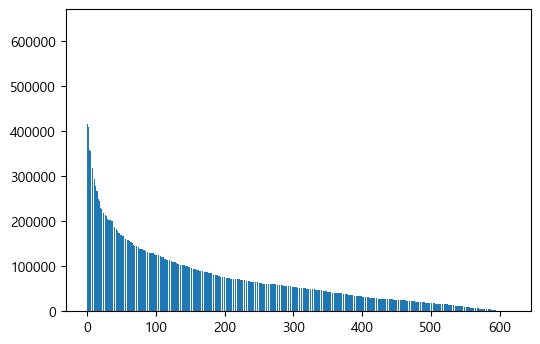

In [120]:
import matplotlib.pyplot as plt

passenger_list.sort(reverse=True)
plt.figure(dpi=100)
plt.bar(range(len(passenger_list)), passenger_list)
plt.show()

In [125]:
# 위에 코드 대신에 이거 사용해도 됨
for idx, col in enumerate(df.columns):
    if (subway_df[col].dtypes == 'object') & idx > 2:
        subway_df[col] = subway_df[col].apply(lambda x: x.replace(',',''))
        
subway_df

KeyError: 201

In [60]:
df.columns
df['07:00:00~07:59:59']['승차']
# df.iloc[:,4:].astype(int)
# df['04:00:00~04:59:59']['승차']
df['08:00:00~08:59:59']['승차']

df[('08:00:00~08:59:59', '승차')].apply(lambda x: x.replace(',',''))

# df.iloc[:,4:].applymap(lambda x: x.replace(',',''))

AttributeError: 'int' object has no attribute 'replace'

사용월                호선명                역ID  \
    Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
0              2022-06                1호선                150   
1              2022-06                1호선                151   
2              2022-06                1호선                152   
3              2022-06                1호선                153   
4              2022-06                1호선                154   
..                 ...                ...                ...   
610            2022-06                신림선               4407   
611            2022-06                신림선               4408   
612            2022-06                신림선               4409   
613            2022-06                신림선               4410   
614            2022-06                신림선               4411   

                  지하철역 04:00:00~04:59:59     05:00:00~05:59:59        \
    Unnamed: 3_level_1                승차  하차                승차    하차   
0                  서울역               646  24              8433  7694   
1                   시청               271   7              3133  4802   
2                   종각                91   9              4007  3960   
3                 종로3가               190  12              3882  3261   
4                 종로5가                34   0              1730  3909   
..                 ...               ...  ..               ...   ...   
610                 당곡                 0   0              1061   118   
611                 신림                 2   1               651   153   
612                 서원                 2   1              1287   151   
613            서울대벤처타운                10   3              3314   166   
614           관악산(서울대)                 2   5               475   742   

    06:00:00~06:59:59         ... 23:00:00~23:59:59 00:00:00~00:59:59        \
                   승차     하차  ...                하차                승차    하차   
0               12608  46963  ...             15480               158  1332   
1                3321  23621  ...              2938                72   422   
2                3682  22533  ...              3590               315   394   
3                3570  14038  ...              4119               310   843   
4                2986  16406  ...              2628                98   668   
..                ...    ...  ...               ...               ...   ...   
610              2650    704  ...              2710               156   637   
611               853    488  ...              2023               177   629   
612              2552    513  ...              3281                68   782   
613              5162   1676  ...              7279               180  1974   
614              1258   1712  ...              1224                90   412   

    01:00:00~01:59:59     02:00:00~02:59:59    03:00:00~03:59:59     \
                   승차  하차                승차 하차                승차 하차   
0                   1   4                 0  1                 0  0   
1                   0   2                 0  0                 0  0   
2                   0   1                 0  0                 0  0   
3                   3   3                 0  0                 0  0   
4                   0   0                 0  0                 0  0   
..                ...  ..               ... ..               ... ..   
610                 0   0                 0  0                 0  0   
611                 0   1                 0  0                 0  0   
612                 2   2                 0  0                 0  0   
613                 1  40                 0  0                 0  0   
614                 1  33                 0  0                 0  0   

                    작업일시  
     Unnamed: 52_level_1  
0    2022-07-03 09:48:05  
1    2022-07-03 09:48:05  
2    2022-07-03 09:48:05  
3    2022-07-03 09:48:05  
4    2022-07-03 09:48:05  
..                   ...  
610  2022-07-03 09:48:05  
611  2022-07-03 09:48:05  
612  2022-07-03 09:48:05  
